<a href="https://colab.research.google.com/github/Mashael0x/News-Classification/blob/main/News_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

In [27]:
cats = ['sci.crypt','sci.med','comp.graphics','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','rec.sport.hockey','rec.sport.baseball']
train = fetch_20newsgroups(subset= 'train',remove=('headers', 'footers', 'quotes'), categories= cats)

In [28]:
test = fetch_20newsgroups(subset='test',shuffle=True, categories = cats,remove=('headers', 'footers', 'quotes') ,random_state=42)

In [29]:
type(train), type(test)

(sklearn.utils.Bunch, sklearn.utils.Bunch)

(sklearn.utils.Bunch, sklearn.utils.Bunch)

### **Converting Bunch object to Data Frame**

In [30]:
train_df = pd.DataFrame([train.data, train.target.tolist()]).T
train_df.columns = ['text','target']
title = pd.DataFrame(train.target_names)
title.columns = ['title']
train_df = pd.merge(train_df, title, left_on = 'target', right_index=True)

In [31]:
train_df.head()

,text,target,title
0,Just a quick THANKS to the many who explained ...,1,comp.sys.ibm.pc.hardware
21,"misc.entrepreneurs,misc.wanted,pnw.forsale,uw....",1,comp.sys.ibm.pc.hardware
26,B\nBK>Is it possible to plug in 70ns or 60ns S...,1,comp.sys.ibm.pc.hardware
29,hi folks\ni have 2 hd first is an seagate 130m...,1,comp.sys.ibm.pc.hardware
30,This is for a friend of mine. Please send answ...,1,comp.sys.ibm.pc.hardware


,text,target,title
0,Just a quick THANKS to the many who explained ...,1,comp.sys.ibm.pc.hardware
21,"misc.entrepreneurs,misc.wanted,pnw.forsale,uw....",1,comp.sys.ibm.pc.hardware
26,B\nBK>Is it possible to plug in 70ns or 60ns S...,1,comp.sys.ibm.pc.hardware
29,hi folks\ni have 2 hd first is an seagate 130m...,1,comp.sys.ibm.pc.hardware
30,This is for a friend of mine. Please send answ...,1,comp.sys.ibm.pc.hardware


In [32]:
train_df.title.value_counts()

rec.sport.hockey            600
rec.sport.baseball          597
sci.crypt                   595
sci.med                     594
comp.sys.ibm.pc.hardware    590
comp.graphics               584
comp.sys.mac.hardware       578
Name: title, dtype: int64

rec.sport.hockey            600
rec.sport.baseball          597
sci.crypt                   595
sci.med                     594
comp.sys.ibm.pc.hardware    590
comp.graphics               584
comp.sys.mac.hardware       578
Name: title, dtype: int64

In [33]:
train_df.isnull().sum()

text      0
target    0
title     0
dtype: int64

text      0
target    0
title     0
dtype: int64

In [34]:
test_df = pd.DataFrame([test.data, test.target.tolist()]).T
test_df.columns = ['text','target']
title = pd.DataFrame(test.target_names)
title.columns = ['title']
test_df = pd.merge(test_df, title, left_on = 'target', right_index=True)

In [35]:
test_df.head()

,text,target,title
0,Is there any judgement call on the part of the...,3,rec.sport.baseball
8,"\n\tYeah, maybe that is more likely. But from...",3,rec.sport.baseball
14,\nWIP is the REAL home of the Eagles. Merril ...,3,rec.sport.baseball
22,\nIt is ironic that in any post that criticize...,3,rec.sport.baseball
26,"\nAfter a quick start, Pena has been stuck in ...",3,rec.sport.baseball


,text,target,title
0,Is there any judgement call on the part of the...,3,rec.sport.baseball
8,"\n\tYeah, maybe that is more likely. But from...",3,rec.sport.baseball
14,\nWIP is the REAL home of the Eagles. Merril ...,3,rec.sport.baseball
22,\nIt is ironic that in any post that criticize...,3,rec.sport.baseball
26,"\nAfter a quick start, Pena has been stuck in ...",3,rec.sport.baseball


In [36]:
test_df.isnull().sum()

text      0
target    0
title     0
dtype: int64

text      0
target    0
title     0
dtype: int64

In [37]:
test_df.title.value_counts()

rec.sport.hockey            399
rec.sport.baseball          397
sci.crypt                   396
sci.med                     396
comp.sys.ibm.pc.hardware    392
comp.graphics               389
comp.sys.mac.hardware       385
Name: title, dtype: int64

rec.sport.hockey            399
rec.sport.baseball          397
sci.crypt                   396
sci.med                     396
comp.sys.ibm.pc.hardware    392
comp.graphics               389
comp.sys.mac.hardware       385
Name: title, dtype: int64

## **Exploratory Data Analysis**

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

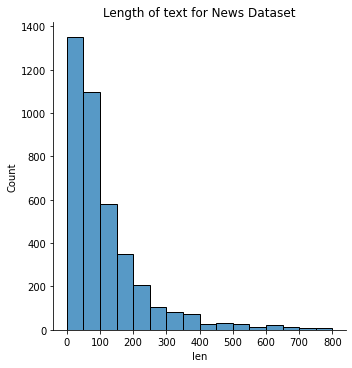

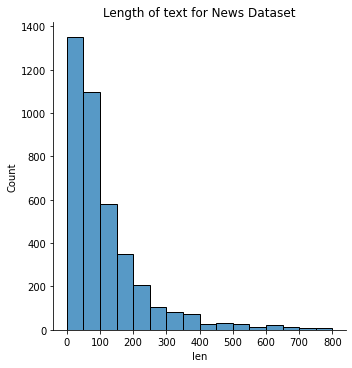

In [39]:
train_df['len'] = train_df['text'].apply(lambda x: len(x.split(' ')))

sns.displot(train_df, x ='len',bins=[0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800])
plt.title('Length of text for News Dataset');

#loading the plot in my device
#from google.colab import files
#plt.savefig("text distribtuion.png", bbox_inches = 'tight', pad_inches = 0.5)
#files.download("text distribtuion.png") 

**clean text for plotting most common words for each news type**

In [40]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words('english')
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [41]:
computer_graphics = train_df[train_df['target'] == 0]
computer_ibm = train_df[train_df['target'] == 1]
computer_mac = train_df[train_df['target'] == 2]
sport_baseball = train_df[train_df['target'] == 3]
sport_hockey = train_df[train_df['target'] == 4]
science_crypto = train_df[train_df['target'] == 5]
science_mdeical = train_df[train_df['target'] == 6]

In [42]:
def clean(text):
  text = word_tokenize(text)
  text = [word.lower() for word in text if word.isalpha()]
  punc = str.maketrans('','', string.punctuation)
  text = [word.translate(punc) for word in text]
  text = [word for word in text if not word in stop_words]
  text = [porter.stem(i) for i in text]
  return text

computer_graphics['clean_text'] = computer_graphics['text'].apply(clean)
computer_ibm['clean_text'] = computer_ibm['text'].apply(clean)
computer_mac['clean_text'] = computer_mac['text'].apply(clean)
sport_baseball['clean_text'] = sport_baseball['text'].apply(clean)
sport_hockey['clean_text'] = sport_hockey['text'].apply(clean)
science_crypto['clean_text'] = science_crypto['text'].apply(clean)
science_mdeical['clean_text'] = science_mdeical['text'].apply(clean)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

**use Counter from collections package to create a function that generates the most common words in our data set.**

In [43]:
from collections import Counter

def counter(text):
  cnt = Counter()
  for msgs in text:
    for msg in msgs:
      cnt[msg] +=1
  return cnt

In [44]:
graphics_counter = counter(computer_graphics['clean_text'])
ibm_counter = counter(computer_ibm['clean_text'])
mac_counter = counter(computer_mac['clean_text'])
baseball_counter = counter(sport_baseball['clean_text'])
hockey_counter = counter(sport_hockey['clean_text'])
crypto_counter = counter(science_crypto['clean_text'])
medical_counter = counter(science_mdeical['clean_text'])

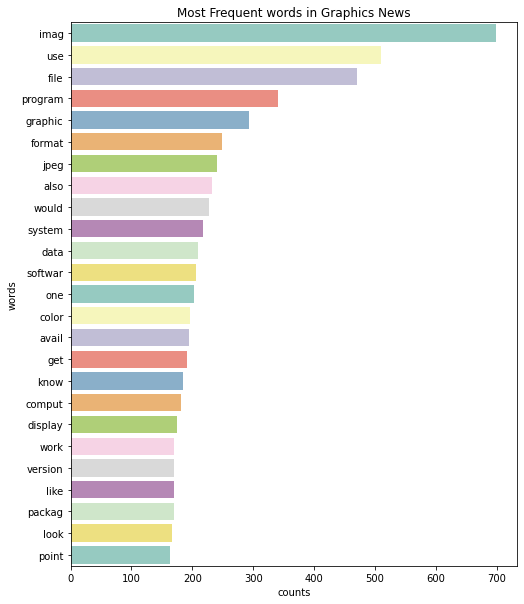

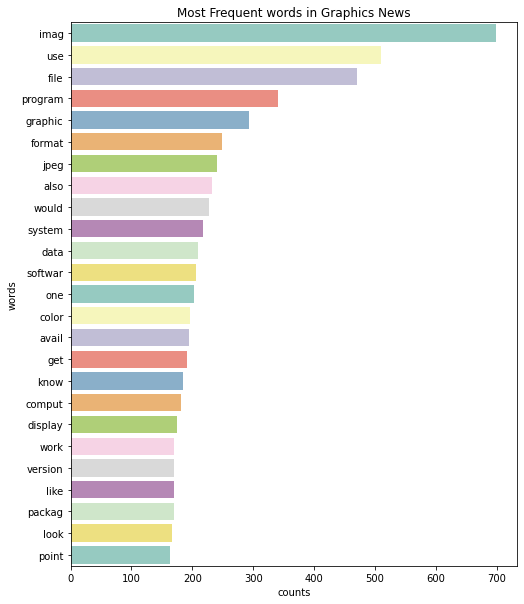

In [45]:
graphics_common_words = graphics_counter.most_common(25)
graphics_common_words = pd.DataFrame(graphics_common_words, columns=['words','counts'])
plt.figure(figsize=(8,10))
plt.title('Most Frequent words in Graphics News')
sns.barplot(x='counts', y='words',data= graphics_common_words, palette='Set3');

#from google.colab import files
#plt.savefig("word frequency_Graphics_News.png", bbox_inches = 'tight', pad_inches = 0.5)
#files.download("word frequency_Graphics_News.png")

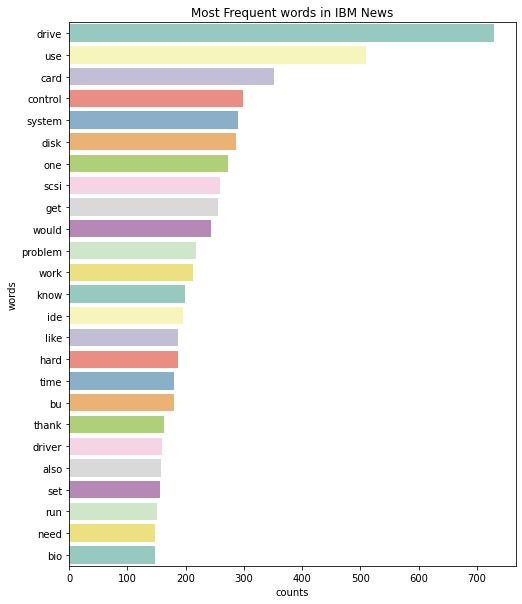

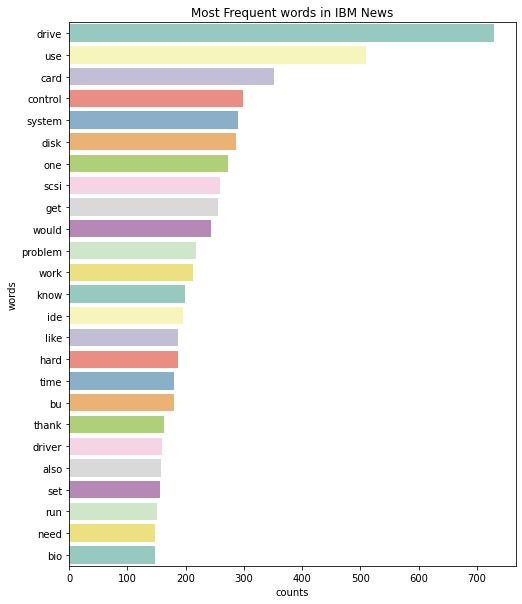

In [46]:
ibm_common_words = ibm_counter.most_common(25)
ibm_common_words = pd.DataFrame(ibm_common_words, columns=['words','counts'])
plt.figure(figsize=(8,10))
plt.title('Most Frequent words in IBM News')
sns.barplot(x='counts', y='words',data= ibm_common_words, palette='Set3');

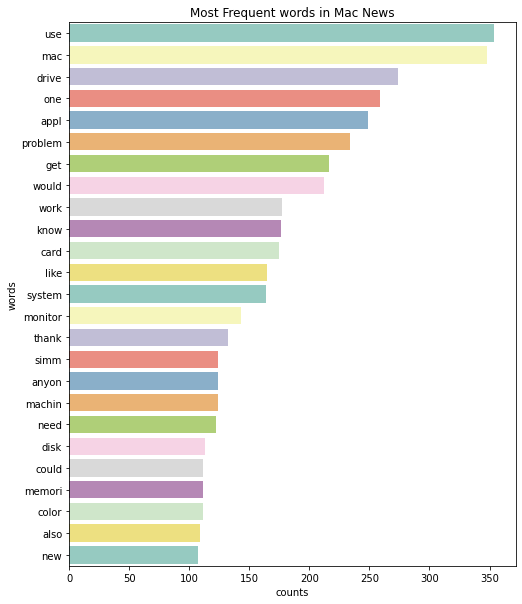

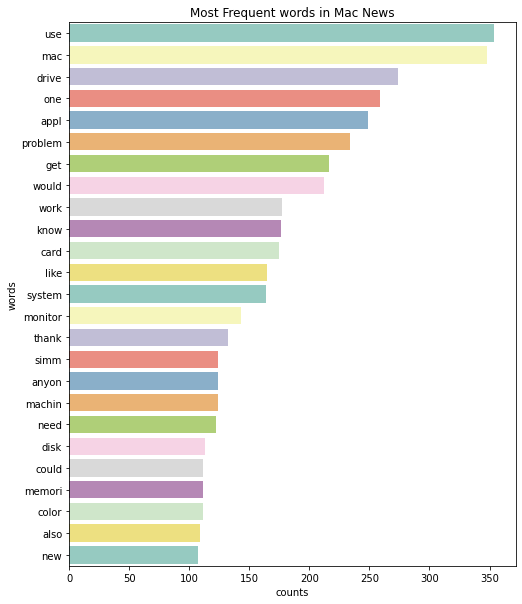

In [47]:
mac_common_words = mac_counter.most_common(25)
mac_common_words = pd.DataFrame(mac_common_words, columns=['words','counts'])
plt.figure(figsize=(8,10))
plt.title('Most Frequent words in Mac News')
sns.barplot(x='counts', y='words',data= mac_common_words, palette='Set3');

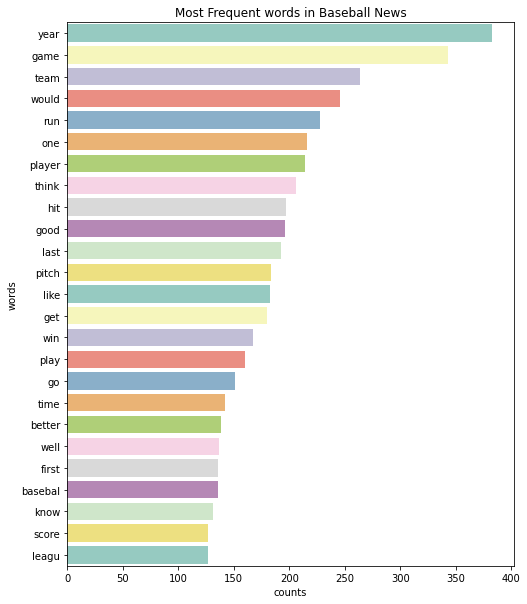

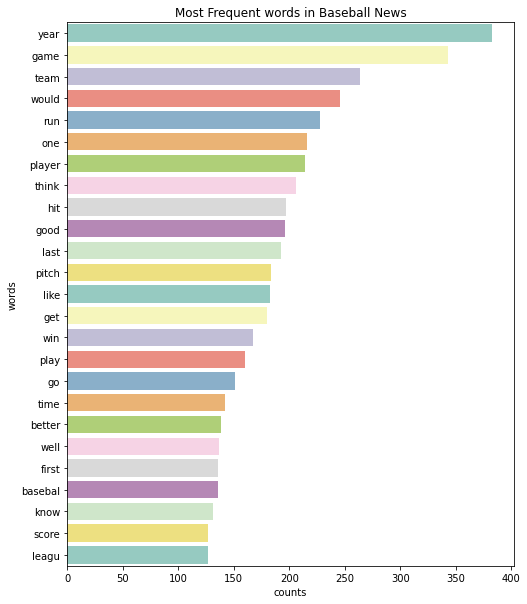

In [48]:
baseball_common_words = baseball_counter.most_common(25)
baseball_common_words = pd.DataFrame(baseball_common_words, columns=['words','counts'])
plt.figure(figsize=(8,10))
plt.title('Most Frequent words in Baseball News')
sns.barplot(x='counts', y='words',data= baseball_common_words, palette='Set3')

#from google.colab import files
#plt.savefig("word frequency_Baseball_News.png", bbox_inches = 'tight', pad_inches = 0.5)
#files.download("word frequency_Baseball_News.png")

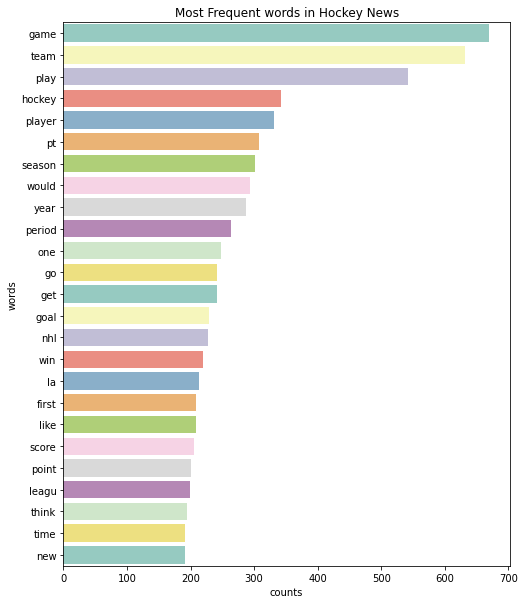

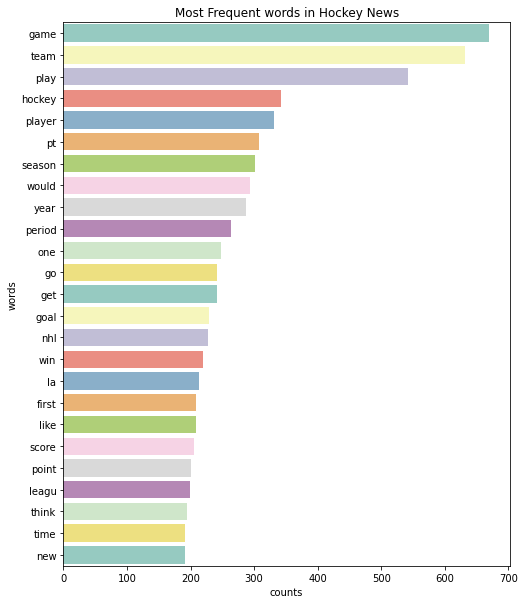

In [49]:

hockey_common_words = hockey_counter.most_common(25)
hockey_common_words = pd.DataFrame(hockey_common_words, columns=['words','counts'])
plt.figure(figsize=(8,10))
plt.title('Most Frequent words in Hockey News')
sns.barplot(x='counts', y='words',data= hockey_common_words, palette='Set3');

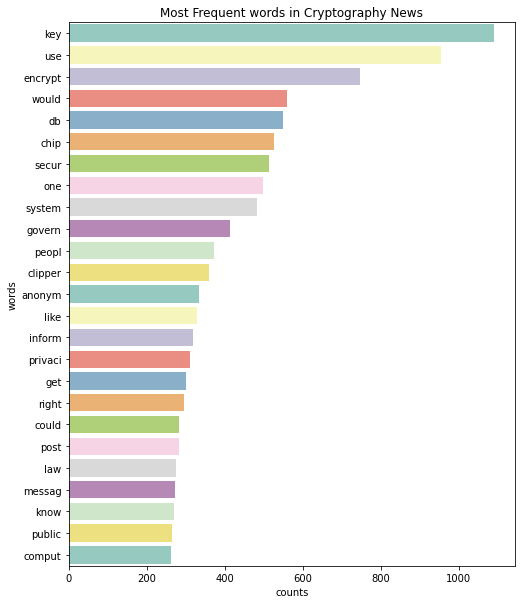

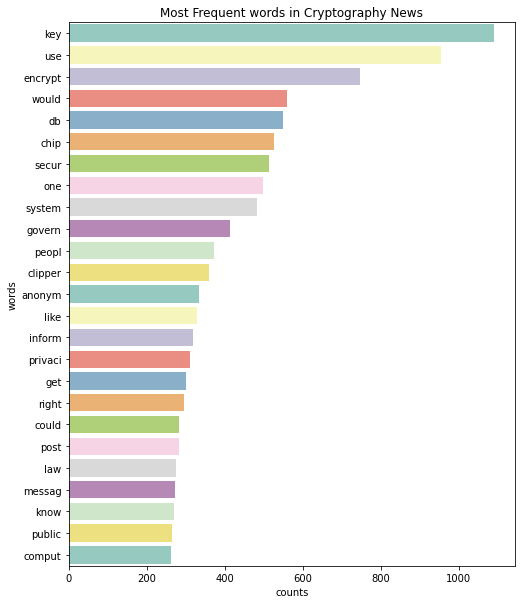

In [50]:
crypto_common_words = crypto_counter.most_common(25)
crypto_common_words = pd.DataFrame(crypto_common_words, columns=['words','counts'])
plt.figure(figsize=(8,10))
plt.title('Most Frequent words in Cryptography News')
sns.barplot(x='counts', y='words',data= crypto_common_words, palette='Set3');

#from google.colab import files
#plt.savefig("word frequency_Cryptography_News.png", bbox_inches = 'tight', pad_inches = 0.5)
#files.download("word frequency_Cryptography_News.png")

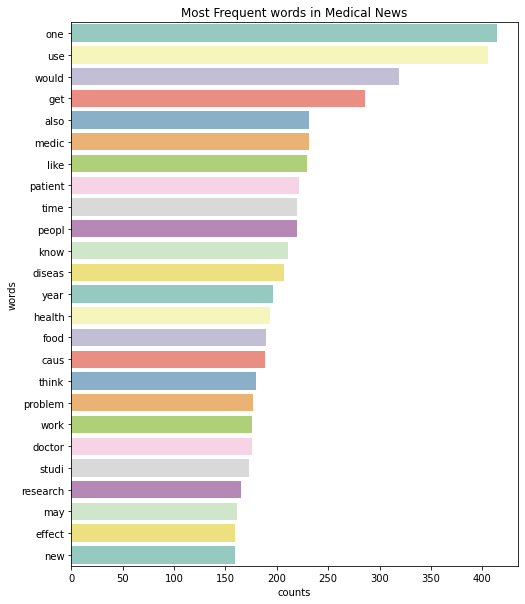

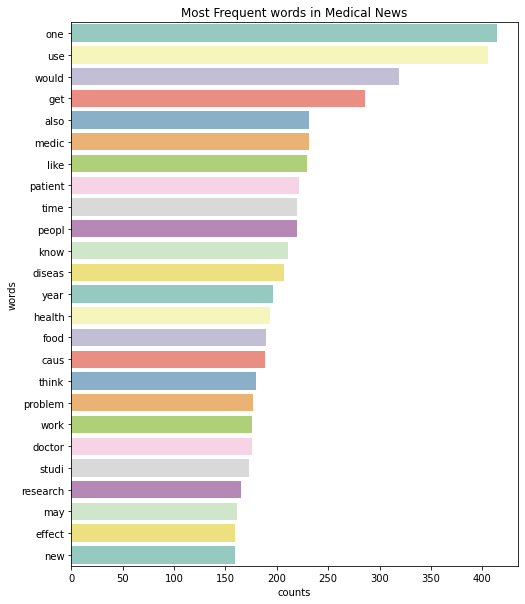

In [51]:
medical_common_words = medical_counter.most_common(25)
medical_common_words = pd.DataFrame(medical_common_words, columns=['words','counts'])
plt.figure(figsize=(8,10))
plt.title('Most Frequent words in Medical News')
sns.barplot(x='counts', y='words',data= medical_common_words, palette='Set3');

**Text Cleaning**

In [52]:
def clean_text(text):
  tokens = word_tokenize(text)
  tokens = [w.lower() for w in tokens]
  table = str.maketrans('', '', string.punctuation)
  stripped = [w.translate(table) for w in tokens] 
  words = [word for word in stripped if word.isalpha()]
  words = [porter.stem(i) for i in words]
  words = ' '.join(word for word in text.split() if word not in stop_words)
  return words

In [53]:
cleaned_text =[clean_text(i) for i in train_df.text]

In [54]:
train_df['cleaned_text'] = cleaned_text

In [55]:
cleaned_text = [clean_text(i) for i in test_df.text]

In [56]:
test_df['cleaned_text'] = cleaned_text

**Text transforming and Modeling**

In [57]:
x_train = train_df['cleaned_text']
y_train = train_df.target.astype('int')

In [58]:
x_test = test_df['cleaned_text']
y_test = test_df.target.astype('int')

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import time

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

pg = {
    # n gram range
    'vect__max_df': [0.5, 0.75, 1.0],
    'vect__max_features': [None, 5000, 10000],
    'tfidf__use_idf': [True, False],
    'tfidf__norm': ['l1', 'l2'],
    'tfidf__sublinear_tf':[True, False],
    'clf__alpha':np.linspace(0.5,1.5,6),
    'clf__fit_prior':[True, False]
}


grid_search = GridSearchCV(pipeline,pg, cv=2, n_jobs = -1)

In [60]:
%time grid_search.fit(x_train, y_train)

CPU times: user 28.4 s, sys: 3.5 s, total: 31.9 s
Wall time: 13min 4s


GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [61]:
grid_search.best_params_

{'clf__alpha': 0.5,
 'clf__fit_prior': False,
 'tfidf__norm': 'l2',
 'tfidf__sublinear_tf': True,
 'tfidf__use_idf': True,
 'vect__max_df': 0.5,
 'vect__max_features': 10000}

In [62]:
grid_search.best_score_

0.833011116481392

In [63]:
preds = grid_search.predict(x_test)

In [64]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, preds)

0.8318809005083515

In [65]:
from sklearn.metrics import classification_report


print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.68      0.82      0.74       389
           1       0.79      0.83      0.81       392
           2       0.80      0.75      0.77       385
           3       0.94      0.84      0.88       397
           4       0.92      0.91      0.91       399
           5       0.82      0.85      0.83       396
           6       0.93      0.83      0.87       396

    accuracy                           0.83      2754
   macro avg       0.84      0.83      0.83      2754
weighted avg       0.84      0.83      0.83      2754

